<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/nn_RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

# torch.nn.RNN()
input_size(H_in) – The number of expected features in the input x

hidden_size(H_out) – The number of features in the hidden state h

num_layers – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results. Default: 1

nonlinearity – The non-linearity to use. Can be either 'tanh' or 'relu'. Default: 'tanh'

bias – If False, then the layer does not use bias weights b_ih and b_hh. Default: True

batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False

dropout – If non-zero, introduces a Dropout layer on the outputs of each RNN layer except the last layer, with dropout probability equal to dropout. Default: 0

bidirectional(D) – If True, becomes a bidirectional RNN. Default: False

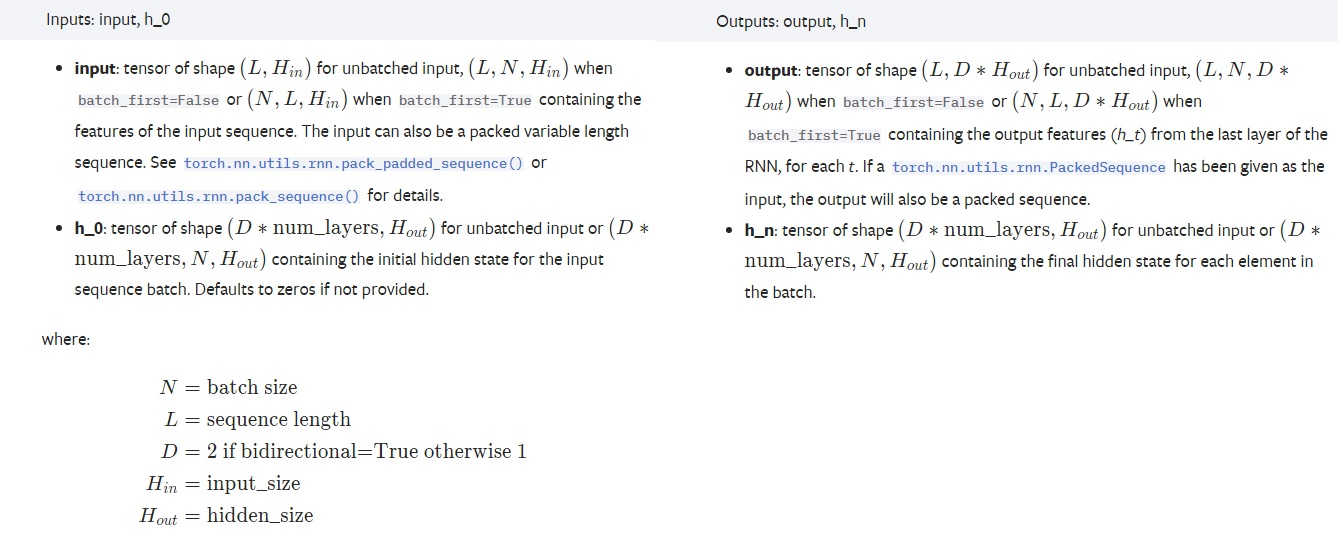

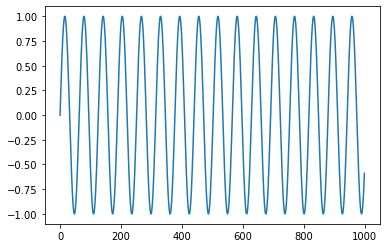

In [ ]:
N = 1000
series = np.sin(0.1*np.arange(N)) # + np.random.randn(N) * 0.1
plt.plot(series);

in this example we give f(t:t+L) input to RNN and it predicts f(t+L) (10 steps we give data and RNN predicts 11th step) ,so L=10 

every time X(input)goes forward one step so , N=990 and H_in=1(each t we give one elemet) so X.shape = (990,10,1)



In [ ]:
a = np.arange(100)
b=a[:10]
c=a[10]
print(b,c)

[0 1 2 3 4 5 6 7 8 9] 10


In [ ]:
L = 10
Y = []
X = []
for t in range(N-L):
  x = series[t:t+L]
  X.append(x)
  y = series[t+10]
  Y.append(y)

X = np.array(X).reshape(-1,L,1)
Y = np.array(Y).reshape(-1,1)

In [ ]:
print(X[:2],'\n',Y[:2])

[[[0.        ]
  [0.09983342]
  [0.19866933]
  [0.29552021]
  [0.38941834]
  [0.47942554]
  [0.56464247]
  [0.64421769]
  [0.71735609]
  [0.78332691]]

 [[0.09983342]
  [0.19866933]
  [0.29552021]
  [0.38941834]
  [0.47942554]
  [0.56464247]
  [0.64421769]
  [0.71735609]
  [0.78332691]
  [0.84147098]]] 
 [[0.84147098]
 [0.89120736]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,test_size=0.2,shuffle=False
)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(792, 10, 1) (198, 10, 1) (792, 1) (198, 1)


In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32)).to(device)
X_test = torch.from_numpy(X_test.astype(np.float32)).to(device)
Y_train = torch.from_numpy(Y_train.astype(np.float32)).to(device)
Y_test = torch.from_numpy(Y_test.astype(np.float32)).to(device)

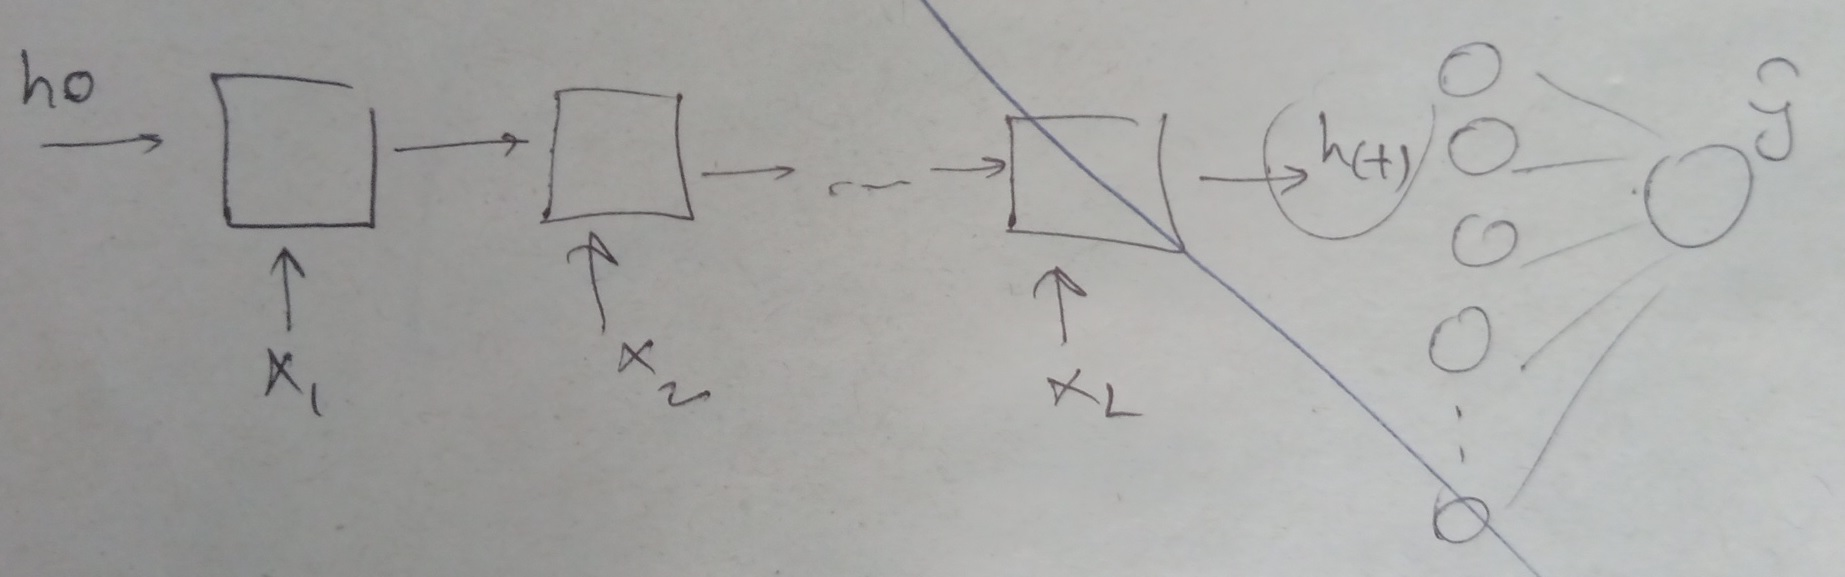

In [ ]:
class SimpleRNN(nn.Module):
  def __init__(self,n_input,n_hidden,n_layers,n_output):
    super().__init__()
    self.H_out = n_hidden
    self.n_layers = n_layers
    
    self.rnn = nn.RNN(input_size=n_input,
                      hidden_size=n_hidden,
                      num_layers=n_layers,
                      nonlinearity='relu',
                      batch_first=True,
                      )
    self.fc = nn.Linear(n_hidden,n_output)

  def forward(self,x):
    h0 = torch.zeros(self.n_layers,x.shape[0],self.H_out).to(device) 
    out,_ = self.rnn(x,h0)
    # we only want output features (h_t) of the final step t
    out = self.fc(out[:,-1,:])

    return out


In [ ]:
model = SimpleRNN(n_input=1,n_hidden=5,n_layers=1,n_output=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
X_train_loader = torch.utils.data.DataLoader(X_train,batch_size=1)
Y_train_loader = torch.utils.data.DataLoader(Y_train,batch_size=1)
print(next(iter(X_train_loader)).shape)
print(next(iter(Y_train_loader)).shape)

torch.Size([1, 10, 1])
torch.Size([1, 1])


In [ ]:
X_train[0:1].shape

torch.Size([1, 10, 1])

In [ ]:
model(X_train[0:1]).shape

torch.Size([1, 1])

In [ ]:
criterion(model(X_train[0:1]),Y_train[0:1])

tensor(1.5676, device='cuda:0', grad_fn=<MseLossBackward0>)

In [ ]:
Y_train[0:1].shape

torch.Size([1, 1])

____________________ Epoch : 1/3 ____________________
step 50/792 : accuracy = 0.35840775839285927
step 100/792 : accuracy = 0.29392972178990023
step 150/792 : accuracy = 0.23835636331990828
step 200/792 : accuracy = 0.07546305036590638
step 250/792 : accuracy = 0.06480808020860422
step 300/792 : accuracy = 0.1596246318654812
step 350/792 : accuracy = 0.08839534418671974
step 400/792 : accuracy = 0.03347605816496071
step 450/792 : accuracy = 0.024181211430695838
step 500/792 : accuracy = 0.024807519456953742
step 550/792 : accuracy = 0.020392706068892038
step 600/792 : accuracy = 0.021521470997831783
step 650/792 : accuracy = 0.013793560509434144
step 700/792 : accuracy = 0.015161236584826838
step 750/792 : accuracy = 0.016334874279855284
____________________ Epoch : 2/3 ____________________
step 50/792 : accuracy = 0.35840775839285927
step 100/792 : accuracy = 0.29392972178990023
step 150/792 : accuracy = 0.23835636331990828
step 200/792 : accuracy = 0.07546305036590638
step 250/792 :

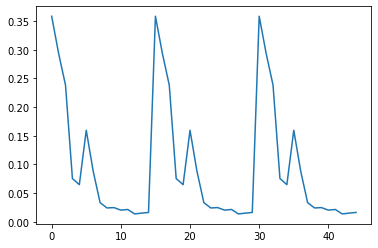

In [ ]:
model.train()
num_epochs=3
losses = []
acc = []
for epoch in range(num_epochs):
  print(f'{"_"*20} Epoch : {epoch+1}/{num_epochs} {"_"*20}')
  for i in range(X_train.shape[0]):
    y_pred = model(X_train[i:i+1])
    loss = criterion(y_pred,Y_train[i:i+1])
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1)%50 == 0:
      accuracy = sum(losses[i-49:i])/100.
      print(f'step {i+1}/{X_train.shape[0]} : accuracy = {accuracy}')
      acc.append(accuracy)

plt.plot(acc)

In [ ]:
model.eval()
y_pred = model(X_test).cpu().detach().numpy()

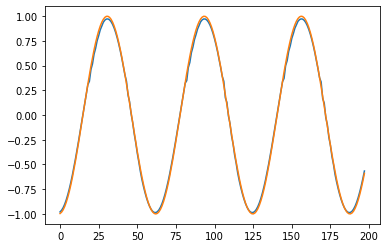

In [ ]:
plt.plot(y_pred)
plt.plot(Y_test.cpu().detach().numpy())

up accuracy check is not correct because we must use predicted previous steps to predict a new step

In [ ]:
print(X_test.shape)
print(Y_test.shape)

torch.Size([198, 10, 1])
torch.Size([198, 1])


In [ ]:
x=X_train[0:1]
y = model(x)
y = y.reshape(1,-1,1)

In [ ]:
print(X_train[0:1].shape)
print(y.shape)

torch.Size([1, 10, 1])
torch.Size([1, 1, 1])


In [ ]:
torch.cat((x[:,1:,],y),dim=1).shape

torch.Size([1, 10, 1])

In [ ]:
with torch.no_grad():
  last_10x = X_test[0:1]
  Y_pred =[]
  i = 0
  while(len(Y_pred)<Y_test.shape[0]):
    y_pred = model(last_10x).reshape(1,-1,1)
    Y_pred.append(y_pred.detach().cpu().numpy().ravel())
    last_10x = torch.cat((last_10x[:,1:,],y_pred),dim=1)


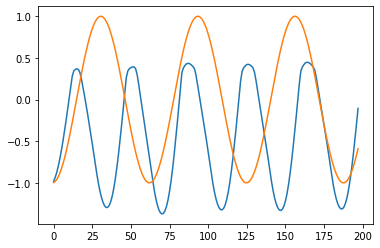

In [ ]:
plt.plot(Y_pred)
plt.plot(Y_test.cpu().detach().numpy())

# New Section: Pytorch LSTMs for time-series data
[link text](https://towardsdatascience.com/pytorch-lstms-for-time-series-data-cd16190929d7)

we are generating N different sine waves, each with a multitude of points. The LSTM network learns by examining not one sine wave, but many.


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 100 # number of samples
L = 1000 # length of each sample (number of values for each sine wave)
T = 20 # width of the wave
x = np.empty((N,L), np.float32) # instantiate empty array
x[:] = np.arange(L) + np.random.randint(-4*T, 4*T, N).reshape(N,1)
y = np.sin(x/1.0/T).astype(np.float32)

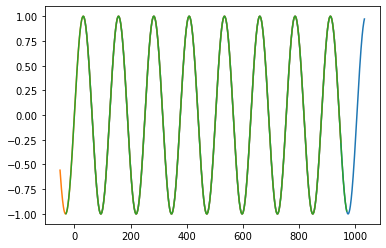

In [13]:
plt.plot(x[0],y[0])
plt.plot(x[1],y[1])
plt.plot(x[5],y[5])



nn.LSTMCell  means just one LTSM cell


Some of you may be aware of a separate torch.nn class called LSTM. The distinction between the two is not really relevant here, but just know that LSTMCell is more flexible when it comes to defining our own models from scratch using the functional API.

We define two LSTM layers using two LSTM cells. Much like a convolutional neural network, the key to setting up input and hidden sizes lies in the way the two layers connect to each other. For the first LSTM cell, we pass in an input of size 1. Recall why this is so: in an LSTM, we don’t need to pass in a sliced array of inputs. We don’t need a sliding window over the data, as the memory and forget gates take care of the cell state for us. We don’t need to specifically hand feed the model with old data each time, because of the model’s ability to recall this information. This is what makes LSTMs so special.

We then give this first LSTM cell a hidden size governed by the variable when we declare our class, n_hidden. This number is rather arbitrary; here, we pick 64. As mentioned above, this becomes an output of sorts which we pass to the next LSTM cell, much like in a CNN: the output size of the last step becomes the input size of the next step. In this cell, we thus have an input of size hidden_size, and also a hidden layer of size hidden_size. We then pass this output of size hidden_size to a linear layer, which itself outputs a scalar of size one. We are outputting a scalar, because we are simply trying to predict the function value y at that particular time step.

In [19]:
print(y.shape)
a = y.split(1, dim=1)
a[2].shape

(100, 1000)


AttributeError: ignored

In [21]:
print(y.shape)
a = torch.from_numpy(y)
#torch.split(1,dim=1)
# it will simply split each tensor into chunks of size 1. We want to split this along each individual batch,
# so our dimension will be the rows, which is equivalent to dimension 1
b = a.split(1, dim=1) # (100,1000) >> (100,1),(100,1),...,(100,1)
print(b[2].shape)
print(b[99].shape)

(100, 1000)
torch.Size([100, 1])
torch.Size([100, 1])


In [ ]:
class LTSM(nn.Module):
  def __init__(self,n_hidden):
    super().__init__()
    self.n_hidden = n_hidden

    self.ltsm1 = nn.LSTMCell(1,n_hidden)
    self.ltsm2 = nn.LSTMCell(n_hidden,n_hidden)
    self.fc = nn.Linear(n_hidden,1)

  def forward(self,y)